# Ch4 신경망 학습

In [ ]:
## 손실함수
import numpy as np

# 평균제곱 오차
def mean_squared_error(y,t): # 신경망의 출력, 정답 레이블
    return 0.5*np.sum((y-t)**1)

# 교차엔트로피 오차
def cross_entropy_error(y,t): # 출력, 정답
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

# 배치용 교차엔트로피
# (1) 정답 : 원핫인코딩으로 주어졌을 때
def cross_entropy_error1(y,t): # 출력, 정답
    if y.ndim == 1: # y 1차원 = 데이터 하나당 교차 엔트로피 오차를 구하는 경우
        t=t.reshape(1, t.size) # 배열화
        y=y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y+delta)) / batch_size

# (2) 정답 : 숫자 레이블
def cross_entropy_error2(y,t):
    if y.ndim == 1: # y 1차원 = 데이터 하나당 교차 엔트로피 오차를 구하는 경우
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum( np.log(y[np.arange(batch_size), t]+delta)) / batch_size

In [ ]:
# 미니 배치 학습
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=Ture)

train_size = x_train.shape[0]
batch_size=10 # 10개의 미니 배치사이즈
batch_mask = np.random.choice(train_size, batch_size) # train_size에서 무작위로 10개의 데이터를 추출
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

### 수치 미분

In [2]:
import numpy as np
import matplotlib.pylab as plt

# 미분
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

# 함수 1 일반 미분
def function_1(x):
    return 0.01*x**2 + 0.1*x 
print(numerical_diff(function_1, 5))

# 함수 2 따로 편미분
def function_2(x):
    return x[0]**2 + x[1]**2
# x[0]=3, x[1]=4 일때, x[0]에 대한 편미분 구하기
def function_tmp1(x0):
    return x0**2 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)

0.1999999999990898


6.00000000000378

No handles with labels found to put in legend.


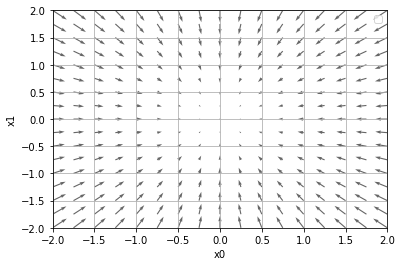

In [3]:
# 기울기 : 모든 벡터의 편미분을 벡터로 정리한 것
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# 기울기 구하기
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x값과 형상이 같은 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h) # 미분
        x[idx] = tmp_val # 값 복원 시켜두기
    return grad

# 기울기 구하기
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
# 기울기 결과에 마이너스를 붙인 벡터 == 가장 낮은 값을 찾음
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

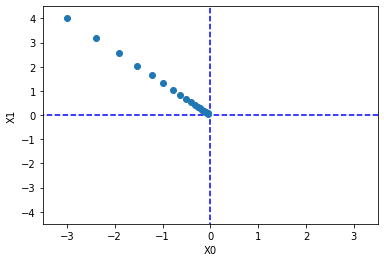

In [5]:
# 경사하강법

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
#from gradient_2d import numerical_gradient
# 경사하강법 ( 최적화함수, 초기값, 학습률, 반복회수 )
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show() # 0,0으로 모여듦

In [ ]:
# 신경망에서의 기울기
# coding: utf-8
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
    def predict(self, x): # 예측 수행 메서드
        return np.dot(x, self.W)
    def loss(self, x, t): # 손실 함수 구현 메서드
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

In [6]:
## 학습 알고리즘 구현
# 1. 전제 가중치, 편향이 있고 학습(가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정)함
# 2. 미니배치 : 손실 함수 값을 줄이는 것이 목표
# 3. 기울기 산출 : 손실 함수의 값을 가장 작게 하는 방향 제시
# 4. 매개변수 갱신 : 가중치 매개 변수를 기울기 방향으로 조금 갱신
# 위 단계 반복

In [1]:
# 2층 신경망 클래스 구현
import sys, os
sys.path.append(os.pardir)  # 
import numpy as np

#from common.functions import * ==================
def identity_function(x):
    return x
def step_function(x):
    return np.array(x > 0, dtype=np.int)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)
def relu(x):
    return np.maximum(0, x)
def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x)

def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size
def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)


# from common.gradient import numerical_gradient-------
# 기울기 미분
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
    return grad


# 시작
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 가중치 초기화 ( 입력층의 뉴런수, 은닉층의 뉴런수, 출력층의 뉴런 수)
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    # 예측 수행, x=이미지 데이터
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력데이터 t : 정답레이블
    # 손실함수 값 구하기
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t) # 교차 엔트로피 손실함수
    
    # 정확도 구하기
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력데이터 t : 정답 레이블    
    # 가중치 매개변수의 기울기 구하기
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        # 기울기 보관하는 딕셔너리 변수
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    # 가중치 매개변수의 기울기 구하기, 위에것보다 나은 성능
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        # params = 신경망의 매개변수를 보관하는 딕셔너리 변수
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads
